**C**

Each year, numerous research papers are published on **"cigar-shaped"** and on **"pancake-shaped" Bose-Einstein condensates**  (just do a  google search to convince yourself!). The first ones, in a  limit, reduce to one-dimensional condensates, and the second one is  close to two-dimensional condensates. To study them, download the below  program, which gives the function levy_harmonic_path_3d for spring  constants (omega_x, omega_y, omega_z).


**C1**

Modify this program so that it allows you to do input and output, as in section B1. Run the program several times at temperature T* = 0.7 for N=512 particles. Use two sets of parameters.

Then answer the following questions (attention: read all the questions of section C1 before continuing):

- Can you identify which of the two choices corresponds to the "pancake-shaped" trap? Run the simulation for 5 or 10 minutes, then upload one figure of the final pancake-shaped configuration.

NB:  if you are unable to get mpl_toolkits.mplot3d.axes3d.Axes3D to run,  simply produce histograms in two-dimensional cuts in xy, xz, and yz.

omega:  [1.0, 5.0, 1.0]
starting from file data_boson_configuration_anisotropic.txt


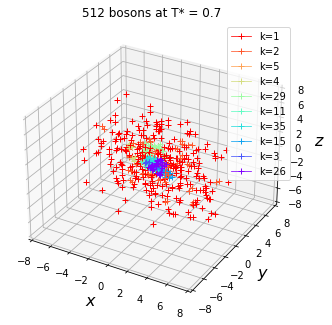

In [17]:
import random, math, numpy, os, sys

omega = [4.0, 4.0, 1.0] # example, please adapt
omega = [1.0, 5.0, 1.0] # example, please adapt

def levy_harmonic_path_3d_anisotropic(k):
    sigma = [1.0 / math.sqrt(2.0 * omega[d] *
             math.tanh(0.5 * k * beta * omega[d])) for d in range(3)]
    xk = tuple([random.gauss(0.0, sigma[d]) for d in range(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = [1.0 / math.tanh(beta * omega[d]) +
              1.0 / math.tanh((k - j) * beta * omega[d]) for d in range(3)]
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta * omega[d]) + \
               xk[d] / math.sinh((k - j) * beta * omega[d]) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1[d] for d in range(3)]
        sigma = [1.0 / math.sqrt(Upsilon_1[d] * omega[d]) for d in range(3)]
        dummy = [random.gauss(x_mean[d], sigma[d]) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d_anisotropic(x, xp, beta):
    Upsilon_1 = sum(omega[d] * (x[d] + xp[d]) ** 2 / 4.0 *
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    Upsilon_2 = sum(omega[d] * (x[d] - xp[d]) ** 2 / 4.0 /
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 512
nsteps = 100000
omega_harm = 1.0
for d in range(3):
    omega_harm *= omega[d] ** (1.0 / 3.0)
T_star = 0.7
T = T_star * omega_harm * N ** (1.0 / 3.0)
beta = 1.0 / T
print ('omega: ', omega)
# Initial condition
filename = 'data_boson_configuration_anisotropic.txt'
positions = {}
if os.path.isfile(filename):
    f = open(filename, 'r')
    for line in f:
        a = line.split()
        positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
               tuple([float(a[3]), float(a[4]), float(a[5])])
    f.close()
    if len(positions) != N:
        sys.exit('ERROR in the input file.')
    print ('starting from file', filename)
else:
    for k in range(N):
        a = levy_harmonic_path_3d_anisotropic(1)
        positions[a[0]] = a[0]
    print ('Starting from a new configuration')
for step in range(nsteps):
    boson_a = random.choice(list(positions.keys()))
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]: break
        else: boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path_3d_anisotropic(k)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(list(positions.keys()))
    b_1 = positions.pop(a_1)
    a_2 = random.choice(list(positions.keys()))
    b_2 = positions.pop(a_2)
    weight_new = (rho_harm_3d_anisotropic(a_1, b_2, beta) *
                  rho_harm_3d_anisotropic(a_2, b_1, beta))
    weight_old = (rho_harm_3d_anisotropic(a_1, b_1, beta) *
                  rho_harm_3d_anisotropic(a_2, b_2, beta))
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1], positions[a_2] = b_2, b_1
    else:
        positions[a_1], positions[a_2] = b_1, b_2

f = open(filename, 'w')
for a in positions:
    b = positions[a]
    f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
           str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
f.close()

import pylab, mpl_toolkits.mplot3d
fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
#ax.set_aspect('equal')
n_colors = 10
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = list(positions_copy)[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
pylab.title(str(N) + ' bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 8.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.show()                                     